In [1]:
from ece470_lib import *
from IPython.display import clear_output
from time import time
inTOmm = 25.4;

# Joint Axes Orientations
a0 = [0,0,1];
a1 = [0,-1,0];
a2 = [0,-1,0];
a3 = [0,-1,0];
a4 = [1,0,0];
a5 = [1,0,0];

# Joint Axes Positions (Ant point on axis)
q0 = [0,0,0];
q1 = [3.76*inTOmm,0,8.11*inTOmm];
q2 = [11.76*inTOmm,0,8.11*inTOmm];
q3 = [17.76*inTOmm,0,8.11*inTOmm];
q4 = [19.48*inTOmm,0,8.11*inTOmm];
q5 = [19.48*inTOmm,50,8.11*inTOmm];

# Convert to Screws (rotation about an axis+linear motions along screw)
s0 = toScrew(a0,q0);
s1 = toScrew(a1,q1);
s2 = toScrew(a2,q2);
s3 = toScrew(a3,q3);
s4 = toScrew(a4,q4);
s5 = toScrew(a5,q5);

# Assemble Screw Bank
S=[s0,s1,s2,s3,s4]#,s5]


#       [xToolInSpace, yToolInSpace, zToolInSpace]
toolRot = np.array([[ 0,0,1],# tool frame axes expressed in space frame coordiantes
                    [ 0,1,0],
                    [-1,0,0]]);

toolPos = np.array([[19.48*inTOmm+400 , 0 , 8.11*inTOmm]]).transpose(); #position of tool end in space frame
M=toPose(toolRot,toolPos); # Assemble Pose Matrix of Tool in space frame coordiantes

# define goal Pose
goalRot = np.eye(3);
X=np.arange(-10,500,20);
# Y=X;
Y=np.array([0])
Z=np.arange(600,1220,20)

In [2]:
%who

Dist3D	 M	 S	 Tree	 X	 Y	 Z	 a0	 a1	 
a2	 a3	 a4	 a5	 adj_T	 bracket	 checkcollision	 checkselfcollision	 clear_output	 
evalJ	 evalT	 expm	 finalpos	 findIK	 fromPose	 goalRot	 inTOmm	 inv_bracket	 
isValidTheta	 logm	 matrix_linspace	 multi_transform	 norm	 np	 pinv	 q0	 q1	 
q2	 q3	 q4	 q5	 s0	 s1	 s2	 s3	 s4	 
s5	 sequential_Ts	 skew4	 time	 toPose	 toScrew	 toTs	 toolPos	 toolRot	 



In [3]:
def validThetas():
    validTheta = np.zeros((X.size, Y.size, Z.size)); # indicates presence of solution at each test point
    thetaMap = [[[np.ones((6,1))*-99 for i in range(Z.size)] for j in range(Y.size)] for k in range(X.size)]; #initiate ik Map
    valCount=0
    invalCount = 0
    totCount=0
    lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
    tcur=time()
    tprev=time()
    tstart=time()
    for i in range(X.size):
        for j in range(Y.size):
            for k in range(Z.size):
                print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",X.size*Y.size*Z.size,[X[i],Y[j],Z[k]])
                print(tcur-tprev)
                totCount+=1
                goalPos = np.array([[X[i],Y[j],Z[k]]]).transpose();
                goalT = toPose(goalRot,goalPos);
                thetaMat,norm = findIK(goalT, S,M,max_iter=100);
#                 clear_output(wait=True)
                if(len(thetaMat)>0):
                    print(len(thetaMat))
    #                 print(thetaMat,"\n")
                    valCount+=1
                    lastValTheta=thetaMat[0]
                    validTheta[i,j,k]=len(thetaMat);
                    thetaMap[i][j][k]=thetaMat;
                else:
                    invalCount+=1
                    print(norm)
                tcur = time()
                print((tcur-tstart)/totCount*(X.size*Y.size*Z.size-totCount)/3600,'hours until done')
                tprev = tcur
    return [validTheta,thetaMap]
validTheta, thetaMap = validThetas()

valid= 0 invalid= 0 tested 0 out of 806 [-10, 0, 600]
0.0
4.877653624979049e-07
0.1437371896372901 hours until done
valid= 0 invalid= 1 tested 1 out of 806 [-10, 0, 620]
0.0
5.853060383168964e-08
0.1123664629459381 hours until done
valid= 0 invalid= 2 tested 2 out of 806 [-10, 0, 640]
0.0
5.870144438467345e-06
0.15944836300832252 hours until done
valid= 0 invalid= 3 tested 3 out of 806 [-10, 0, 660]
0.0
0.0002466494431042251
0.18680161502626208 hours until done
valid= 0 invalid= 4 tested 4 out of 806 [-10, 0, 680]
0.0
4.798031777694259e-06
0.2373406716585159 hours until done
valid= 0 invalid= 5 tested 5 out of 806 [-10, 0, 700]
0.0
2.995765443711896e-06
0.2536280773304127 hours until done
valid= 0 invalid= 6 tested 6 out of 806 [-10, 0, 720]
0.0
1.4986443289898685e-07
0.23940024598250315 hours until done
valid= 0 invalid= 7 tested 7 out of 806 [-10, 0, 740]
0.0
9.912208723341692e-05
0.2213867033024629 hours until done
valid= 0 invalid= 8 tested 8 out of 806 [-10, 0, 760]
0.0
0.00026942

2
0.38370350290139515 hours until done
valid= 24 invalid= 51 tested 75 out of 806 [30, 0, 860]
0.0
1
0.38322006393420066 hours until done
valid= 25 invalid= 51 tested 76 out of 806 [30, 0, 880]
0.0
1
0.37900346292303755 hours until done
valid= 26 invalid= 51 tested 77 out of 806 [30, 0, 900]
0.0
1
0.37476096268053405 hours until done
valid= 27 invalid= 51 tested 78 out of 806 [30, 0, 920]
0.0
2
0.37054508785155255 hours until done
valid= 28 invalid= 51 tested 79 out of 806 [30, 0, 940]
0.0
1
0.36621891231834885 hours until done
valid= 29 invalid= 51 tested 80 out of 806 [30, 0, 960]
0.0
1
0.3620192728047508 hours until done
valid= 30 invalid= 51 tested 81 out of 806 [30, 0, 980]
0.0
1
0.3578613223551412 hours until done
valid= 31 invalid= 51 tested 82 out of 806 [30, 0, 1000]
0.0
1.1552505942032834
0.3632818779050107 hours until done
valid= 31 invalid= 52 tested 83 out of 806 [30, 0, 1020]
0.0
33.07077681837537
0.36821874647859537 hours until done
valid= 31 invalid= 53 tested 84 out of

483.11504881906063
0.3692668401930067 hours until done
valid= 51 invalid= 99 tested 150 out of 806 [70, 0, 1120]
0.0
653.1718042506424
0.3713569409975328 hours until done
valid= 51 invalid= 100 tested 151 out of 806 [70, 0, 1140]
0.0
364.8438780928855
0.3742390903673674 hours until done
valid= 51 invalid= 101 tested 152 out of 806 [70, 0, 1160]
0.0
551.6252907652649
0.3770920795349427 hours until done
valid= 51 invalid= 102 tested 153 out of 806 [70, 0, 1180]
0.0
641.1502903667764
0.3799879850660051 hours until done
valid= 51 invalid= 103 tested 154 out of 806 [70, 0, 1200]
0.0
717.2790598729408
0.3821270517905553 hours until done
valid= 51 invalid= 104 tested 155 out of 806 [90, 0, 600]
0.0
2.903663098549824
0.38425171761601057 hours until done
valid= 51 invalid= 105 tested 156 out of 806 [90, 0, 620]
0.0
94.60991895938209
0.38567259280587113 hours until done
valid= 51 invalid= 106 tested 157 out of 806 [90, 0, 640]
0.0
98.14387030553799
0.3863711452182335 hours until done
valid= 51 i

159.33470313076495
0.3366903222955621 hours until done
valid= 71 invalid= 151 tested 222 out of 806 [130, 0, 700]
0.0
2.55642098764428e-05
0.33521777576603096 hours until done
valid= 71 invalid= 152 tested 223 out of 806 [130, 0, 720]
0.0
0.0008628962856318895
0.33336116018749423 hours until done
valid= 71 invalid= 153 tested 224 out of 806 [130, 0, 740]
0.0
6.274084454197883e-07
0.3315698441982269 hours until done
valid= 71 invalid= 154 tested 225 out of 806 [130, 0, 760]
0.0
244.1176925120755
0.33070705840135156 hours until done
valid= 71 invalid= 155 tested 226 out of 806 [130, 0, 780]
0.0
274.1139205699992
0.32993315299527065 hours until done
valid= 71 invalid= 156 tested 227 out of 806 [130, 0, 800]
0.0
3.68131872113569e-06
0.32820527185357334 hours until done
valid= 71 invalid= 157 tested 228 out of 806 [130, 0, 820]
0.0
1
0.32709081340391394 hours until done
valid= 72 invalid= 157 tested 229 out of 806 [130, 0, 840]
0.0
1
0.32598848923392915 hours until done
valid= 73 invalid= 1

1
0.2651709372714414 hours until done
valid= 98 invalid= 197 tested 295 out of 806 [170, 0, 920]
0.0
1
0.2638477164614308 hours until done
valid= 99 invalid= 197 tested 296 out of 806 [170, 0, 940]
0.0
1
0.2625365835466146 hours until done
valid= 100 invalid= 197 tested 297 out of 806 [170, 0, 960]
0.0
1
0.2612341865428253 hours until done
valid= 101 invalid= 197 tested 298 out of 806 [170, 0, 980]
0.0
1
0.2599278777924137 hours until done
valid= 102 invalid= 197 tested 299 out of 806 [170, 0, 1000]
0.0
4.3519397197663015
0.25986960548250765 hours until done
valid= 102 invalid= 198 tested 300 out of 806 [170, 0, 1020]
0.0
384.9009395218705
0.2599229715415234 hours until done
valid= 102 invalid= 199 tested 301 out of 806 [170, 0, 1040]
0.0
127.80159627740665
0.26024355882050976 hours until done
valid= 102 invalid= 200 tested 302 out of 806 [170, 0, 1060]
0.0
746.6235300525382
0.2604663951573111 hours until done
valid= 102 invalid= 201 tested 303 out of 806 [170, 0, 1080]
0.0
511.1039991

487.5877310928629
0.21897359878934589 hours until done
valid= 125 invalid= 242 tested 367 out of 806 [210, 0, 1120]
0.0
197.5473658087646
0.2188977782169114 hours until done
valid= 125 invalid= 243 tested 368 out of 806 [210, 0, 1140]
0.0
618.6822381171262
0.21883612982948944 hours until done
valid= 125 invalid= 244 tested 369 out of 806 [210, 0, 1160]
0.0
315.0992483966068
0.21879801261818804 hours until done
valid= 125 invalid= 245 tested 370 out of 806 [210, 0, 1180]
0.0
669.2148896975118
0.21875546160359052 hours until done
valid= 125 invalid= 246 tested 371 out of 806 [210, 0, 1200]
0.0
367.00939831849337
0.21867074058011726 hours until done
valid= 125 invalid= 247 tested 372 out of 806 [230, 0, 600]
0.0
2.430380305250621e-07
0.21773548688869374 hours until done
valid= 125 invalid= 248 tested 373 out of 806 [230, 0, 620]
0.0
3.764991949402145e-08
0.21689261836801624 hours until done
valid= 125 invalid= 249 tested 374 out of 806 [230, 0, 640]
0.0
0.00032112908942692726
0.2159597876

1
0.17627888540006398 hours until done
valid= 161 invalid= 280 tested 441 out of 806 [270, 0, 740]
0.0
1
0.17545542046914694 hours until done
valid= 162 invalid= 280 tested 442 out of 806 [270, 0, 760]
0.0
1
0.1746339451549105 hours until done
valid= 163 invalid= 280 tested 443 out of 806 [270, 0, 780]
0.0
1
0.17381547042945247 hours until done
valid= 164 invalid= 280 tested 444 out of 806 [270, 0, 800]
0.0
1
0.17300584196508598 hours until done
valid= 165 invalid= 280 tested 445 out of 806 [270, 0, 820]
0.0
1
0.17218394284825692 hours until done
valid= 166 invalid= 280 tested 446 out of 806 [270, 0, 840]
0.0
1
0.17136837983158076 hours until done
valid= 167 invalid= 280 tested 447 out of 806 [270, 0, 860]
0.0
1
0.1705537431929556 hours until done
valid= 168 invalid= 280 tested 448 out of 806 [270, 0, 880]
0.0
1
0.16974683464369952 hours until done
valid= 169 invalid= 280 tested 449 out of 806 [270, 0, 900]
0.0
1
0.1689424104719986 hours until done
valid= 170 invalid= 280 tested 450 ou

226.4782244758108
0.1356130648851907 hours until done
valid= 207 invalid= 310 tested 517 out of 806 [310, 0, 1020]
0.0
142.28903690788854
0.13547450382276852 hours until done
valid= 207 invalid= 311 tested 518 out of 806 [310, 0, 1040]
0.0
580.9305352323433
0.13528903861432226 hours until done
valid= 207 invalid= 312 tested 519 out of 806 [310, 0, 1060]
0.0
223.29564520145675
0.13504400921199056 hours until done
valid= 207 invalid= 313 tested 520 out of 806 [310, 0, 1080]
0.0
211.3206409101329
0.1347923649497621 hours until done
valid= 207 invalid= 314 tested 521 out of 806 [310, 0, 1100]
0.0
687.8774777688453
0.1345565851686761 hours until done
valid= 207 invalid= 315 tested 522 out of 806 [310, 0, 1120]
0.0
281.8775349160568
0.13431230532342978 hours until done
valid= 207 invalid= 316 tested 523 out of 806 [310, 0, 1140]
0.0
300.3095426746549
0.13406862074182233 hours until done
valid= 207 invalid= 317 tested 524 out of 806 [310, 0, 1160]
0.0
391.59369758638303
0.13382573976277043 ho

1
0.10237147522602434 hours until done
valid= 240 invalid= 351 tested 591 out of 806 [370, 0, 640]
0.0
1
0.10174255782911727 hours until done
valid= 241 invalid= 351 tested 592 out of 806 [370, 0, 660]
0.0
1
0.10111776708383921 hours until done
valid= 242 invalid= 351 tested 593 out of 806 [370, 0, 680]
0.0
1
0.10049311599346122 hours until done
valid= 243 invalid= 351 tested 594 out of 806 [370, 0, 700]
0.0
1
0.09987041332341043 hours until done
valid= 244 invalid= 351 tested 595 out of 806 [370, 0, 720]
0.0
1
0.09924810901117537 hours until done
valid= 245 invalid= 351 tested 596 out of 806 [370, 0, 740]
0.0
1
0.09862914390389133 hours until done
valid= 246 invalid= 351 tested 597 out of 806 [370, 0, 760]
0.0
1
0.09801133922908617 hours until done
valid= 247 invalid= 351 tested 598 out of 806 [370, 0, 780]
0.0
1
0.09739677644432686 hours until done
valid= 248 invalid= 351 tested 599 out of 806 [370, 0, 800]
0.0
1
0.0967827756040626 hours until done
valid= 249 invalid= 351 tested 600 

26.19058486446799
0.06723621087624017 hours until done
valid= 276 invalid= 389 tested 665 out of 806 [410, 0, 880]
0.0
545.1679441953138
0.06683975703763213 hours until done
valid= 276 invalid= 390 tested 666 out of 806 [410, 0, 900]
0.0
519.813840907143
0.06643835355068631 hours until done
valid= 276 invalid= 391 tested 667 out of 806 [410, 0, 920]
0.0
143.26431151076528
0.0660355889339171 hours until done
valid= 276 invalid= 392 tested 668 out of 806 [410, 0, 940]
0.0
312.1929399891033
0.06563624594708928 hours until done
valid= 276 invalid= 393 tested 669 out of 806 [410, 0, 960]
0.0
276.9725617263934
0.06523030316651757 hours until done
valid= 276 invalid= 394 tested 670 out of 806 [410, 0, 980]
0.0
348.44611723520444
0.06484755200351937 hours until done
valid= 276 invalid= 395 tested 671 out of 806 [410, 0, 1000]
0.0
691.5863557442468
0.06445926722336226 hours until done
valid= 276 invalid= 396 tested 672 out of 806 [410, 0, 1020]
0.0
137.40546379482694
0.06411013859844018 hours u

580.6653481318667
0.035768767947422585 hours until done
valid= 288 invalid= 447 tested 735 out of 806 [450, 0, 1040]
0.0
652.7870193739606
0.035304608531656186 hours until done
valid= 288 invalid= 448 tested 736 out of 806 [450, 0, 1060]
0.0
439.4185832781613
0.034841078398778716 hours until done
valid= 288 invalid= 449 tested 737 out of 806 [450, 0, 1080]
0.0
568.49919039089
0.03437971685601085 hours until done
valid= 288 invalid= 450 tested 738 out of 806 [450, 0, 1100]
0.0
312.9054776769308
0.03391021734448308 hours until done
valid= 288 invalid= 451 tested 739 out of 806 [450, 0, 1120]
0.0
357.73675312727187
0.03345456006129583 hours until done
valid= 288 invalid= 452 tested 740 out of 806 [450, 0, 1140]
0.0
382.9215693477388
0.032984390302940654 hours until done
valid= 288 invalid= 453 tested 741 out of 806 [450, 0, 1160]
0.0
379.7231993000946
0.03251387143427828 hours until done
valid= 288 invalid= 454 tested 742 out of 806 [450, 0, 1180]
0.0
592.8507631448811
0.03204259259062211

798.6105088015499
0.0010818960509819508 hours until done
valid= 288 invalid= 516 tested 804 out of 806 [490, 0, 1180]
0.0
974.2617309169332
0.0005415029765162655 hours until done
valid= 288 invalid= 517 tested 805 out of 806 [490, 0, 1200]
0.0
684.0120829254053
0.0 hours until done


In [4]:
# %store thetaMap
# %store validTheta
# %store -r thetaMap validTheta

# print(X.size,Y.size,Z.size)

In [5]:
# goalRot = np.eye(3);
# goalPos = np.array([[450],[0],[850]]);
# goalT = toPose(goalRot,goalPos);
# thetaMat,norm = findIK(goalT, S,M,max_iter=100);
# print(thetaMat)
# out = evalT(S,[0,20/180*np.pi,130/180*np.pi,-60/180*np.pi,0],M)
# rot,pos = fromPose(out)
# print(rot)
# print(pos)

In [6]:
# i=np.where(X==440)[0][0]
# j=0
# k=np.where(Z==840)[0][0]
# print(X[i],Y[j],Z[k])
# print(thetaMap[i][j][k])

In [7]:
# shp = [len(thetaMap),len(thetaMap[0]),len(thetaMap[0][0])]
# for i in range(shp[0]):
#     for j in range(shp[1]):
#         for k in range(shp[2]):
#             print([X[i],Y[j],Z[k]])
#             for thet in thetaMap[i][j][j]:
#                 print(thet)
#             print()

In [8]:
# count=0
# for i in range(validTheta.shape[0]):
#     for j in range(validTheta.shape[1]):
#         for k in range(validTheta.shape[2]):
#             if(validTheta[i,j,k]==0):
#                 print((X[i],Y[j],Z[k]));
#                 count+=1
                
# print("unreachable points =", count)

In [9]:
# print(thetaMap[0][0][0])

In [10]:
# from time import gmtime
# tmstop = gmtime()

In [11]:
# print(tmstop)

In [12]:
# print(isValidTheta([[159],[120]]))

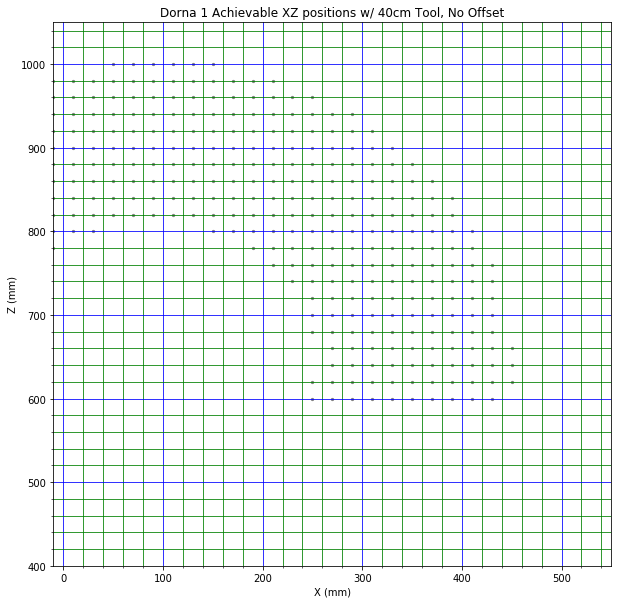

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='g', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs=[]
zs=[]
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            if(validTheta[i,j,k]>0):
                xs.append(X[i])
                zs.append(Z[k])
for i in range(len(zs)):
    zs[i]=zs[i]
plt.scatter(xs,zs,s=5,color='gray')
plt.title("Dorna 1 Achievable XZ positions w/ 40cm Tool, No Offset")
plt.savefig("XZ_SpatialFreedom40cmTool.png")

In [14]:
from math import sqrt
goalRot = np.array([[sqrt(2)/2,0,-sqrt(2)/2],[0,1,0],[sqrt(2)/2,0,sqrt(2)/2]]).transpose()
xs = np.array(xs)
zs = np.array(zs)

In [15]:
validThetaMinus45, thetaMapOffsetMinus45 = validThetas()

valid= 0 invalid= 0 tested 0 out of 806 [-10, 0, 600]
-9.5367431640625e-07
8.344779283540939e-08
0.5079887489477793 hours until done
valid= 0 invalid= 1 tested 1 out of 806 [-10, 0, 620]
0.0
0.00013301831069350713
0.5359375894069671 hours until done
valid= 0 invalid= 2 tested 2 out of 806 [-10, 0, 640]
0.0
0.00010582533515016829
0.5146446343042232 hours until done
valid= 0 invalid= 3 tested 3 out of 806 [-10, 0, 660]
0.0
3.983225728530209e-06
0.5341346280773481 hours until done
valid= 0 invalid= 4 tested 4 out of 806 [-10, 0, 680]
0.0
0.000780774351415565
0.47720621168613436 hours until done
valid= 0 invalid= 5 tested 5 out of 806 [-10, 0, 700]
0.0
5.681168063726556e-07
0.4642314116160075 hours until done
valid= 0 invalid= 6 tested 6 out of 806 [-10, 0, 720]
0.0
3.870656337462904e-08
0.45060302679500885 hours until done
valid= 0 invalid= 7 tested 7 out of 806 [-10, 0, 740]
0.0
0.00028296748830015754
0.4493991093337536 hours until done
valid= 0 invalid= 8 tested 8 out of 806 [-10, 0, 76

9.451658847677888e-06
0.6792754215866695 hours until done
valid= 0 invalid= 72 tested 72 out of 806 [30, 0, 800]
0.0
1.6102245855092137e-05
0.676060744685488 hours until done
valid= 0 invalid= 73 tested 73 out of 806 [30, 0, 820]
0.0
1.376911953054319e-05
0.6696997165357744 hours until done
valid= 0 invalid= 74 tested 74 out of 806 [30, 0, 840]
0.0
25.29764237172829
0.6694895562004161 hours until done
valid= 0 invalid= 75 tested 75 out of 806 [30, 0, 860]
0.0
34.89475774691499
0.6692686053308827 hours until done
valid= 0 invalid= 76 tested 76 out of 806 [30, 0, 880]
0.0
758.8273064855769
0.6705420187618826 hours until done
valid= 0 invalid= 77 tested 77 out of 806 [30, 0, 900]
0.0
286.0100865585355
0.6726795420823274 hours until done
valid= 0 invalid= 78 tested 78 out of 806 [30, 0, 920]
0.0
298.8305463183961
0.6722935314084575 hours until done
valid= 0 invalid= 79 tested 79 out of 806 [30, 0, 940]
0.0
134.1486577365797
0.6717803615033627 hours until done
valid= 0 invalid= 80 tested 80

373.9674637933714
0.621642888918703 hours until done
valid= 1 invalid= 143 tested 144 out of 806 [70, 0, 1000]
0.0
355.269291146374
0.620869042872469 hours until done
valid= 1 invalid= 144 tested 145 out of 806 [70, 0, 1020]
0.0
381.73931414849744
0.6203713083920414 hours until done
valid= 1 invalid= 145 tested 146 out of 806 [70, 0, 1040]
0.0
261.1302731433665
0.6217700452279251 hours until done
valid= 1 invalid= 146 tested 147 out of 806 [70, 0, 1060]
0.0
967.7582589491317
0.6219591986390205 hours until done
valid= 1 invalid= 147 tested 148 out of 806 [70, 0, 1080]
0.0
355.21336747826257
0.6215190714037659 hours until done
valid= 1 invalid= 148 tested 149 out of 806 [70, 0, 1100]
0.0
275.0474619060881
0.6217200190791379 hours until done
valid= 1 invalid= 149 tested 150 out of 806 [70, 0, 1120]
0.0
1228.7964925511458
0.6218932057584885 hours until done
valid= 1 invalid= 150 tested 151 out of 806 [70, 0, 1140]
0.0
720.4181822474573
0.623098377180204 hours until done
valid= 1 invalid= 1

898.2763004468983
0.5415016131605876 hours until done
valid= 9 invalid= 207 tested 216 out of 806 [110, 0, 1200]
0.0
739.9231649361777
0.5414163194005451 hours until done
valid= 9 invalid= 208 tested 217 out of 806 [130, 0, 600]
0.0
1
0.5382829366947898 hours until done
valid= 10 invalid= 208 tested 218 out of 806 [130, 0, 620]
0.0
1
0.5352142204393414 hours until done
valid= 11 invalid= 208 tested 219 out of 806 [130, 0, 640]
0.0
1
0.5323652225016344 hours until done
valid= 12 invalid= 208 tested 220 out of 806 [130, 0, 660]
0.0
1
0.5293411433696746 hours until done
valid= 13 invalid= 208 tested 221 out of 806 [130, 0, 680]
0.0
1
0.526501411217469 hours until done
valid= 14 invalid= 208 tested 222 out of 806 [130, 0, 700]
0.0
1
0.5235764258113974 hours until done
valid= 15 invalid= 208 tested 223 out of 806 [130, 0, 720]
0.0
1
0.5210323901261602 hours until done
valid= 16 invalid= 208 tested 224 out of 806 [130, 0, 740]
0.0
1
0.518325853672734 hours until done
valid= 17 invalid= 208 t

1
0.44495156637158406 hours until done
valid= 35 invalid= 254 tested 289 out of 806 [170, 0, 800]
0.0
247.77112522643162
0.4440390403955832 hours until done
valid= 35 invalid= 255 tested 290 out of 806 [170, 0, 820]
0.0
2.0001129013730828e-05
0.44305617881895437 hours until done
valid= 35 invalid= 256 tested 291 out of 806 [170, 0, 840]
0.0
1.8222711370391945e-08
0.44139014352538275 hours until done
valid= 35 invalid= 257 tested 292 out of 806 [170, 0, 860]
0.0
75.35569011822507
0.4407186142088203 hours until done
valid= 35 invalid= 258 tested 293 out of 806 [170, 0, 880]
0.0
395.3651824229632
0.4400577925194058 hours until done
valid= 35 invalid= 259 tested 294 out of 806 [170, 0, 900]
0.0
29.1588163187363
0.4394003857407866 hours until done
valid= 35 invalid= 260 tested 295 out of 806 [170, 0, 920]
0.0
456.02871479069495
0.43896158785970363 hours until done
valid= 35 invalid= 261 tested 296 out of 806 [170, 0, 940]
0.0
172.12785413829147
0.4383234930178934 hours until done
valid= 35 

823.1996642919602
0.37138750419850786 hours until done
valid= 52 invalid= 309 tested 361 out of 806 [210, 0, 1000]
0.0
367.16661716654426
0.37082234474396397 hours until done
valid= 52 invalid= 310 tested 362 out of 806 [210, 0, 1020]
0.0
301.9104872655169
0.37015468010579117 hours until done
valid= 52 invalid= 311 tested 363 out of 806 [210, 0, 1040]
0.0
724.6377308182196
0.36982247744760816 hours until done
valid= 52 invalid= 312 tested 364 out of 806 [210, 0, 1060]
0.0
404.6034534041426
0.3695987344229058 hours until done
valid= 52 invalid= 313 tested 365 out of 806 [210, 0, 1080]
0.0
359.7150694522974
0.3694984931618645 hours until done
valid= 52 invalid= 314 tested 366 out of 806 [210, 0, 1100]
0.0
355.188647047123
0.3690686700548362 hours until done
valid= 52 invalid= 315 tested 367 out of 806 [210, 0, 1120]
0.0
798.8232511934
0.3685610150945359 hours until done
valid= 52 invalid= 316 tested 368 out of 806 [210, 0, 1140]
0.0
343.22857394126254
0.3679707941422797 hours until done


660.4544489221468
0.3041614169166202 hours until done
valid= 74 invalid= 360 tested 434 out of 806 [270, 0, 600]
0.0
1
0.30276856768770694 hours until done
valid= 75 invalid= 360 tested 435 out of 806 [270, 0, 620]
0.0
1
0.3014975154603414 hours until done
valid= 76 invalid= 360 tested 436 out of 806 [270, 0, 640]
0.0
1
0.30009249058413556 hours until done
valid= 77 invalid= 360 tested 437 out of 806 [270, 0, 660]
0.0
3.4291253934659063e-09
0.29878043207887583 hours until done
valid= 77 invalid= 361 tested 438 out of 806 [270, 0, 680]
0.0
1
0.29741547056871914 hours until done
valid= 78 invalid= 361 tested 439 out of 806 [270, 0, 700]
0.0
1
0.2959995941998381 hours until done
valid= 79 invalid= 361 tested 440 out of 806 [270, 0, 720]
0.0
1
0.29457744210245146 hours until done
valid= 80 invalid= 361 tested 441 out of 806 [270, 0, 740]
0.0
2
0.29316788463031546 hours until done
valid= 81 invalid= 361 tested 442 out of 806 [270, 0, 760]
0.0
2
0.29175938968375004 hours until done
valid= 82

2
0.23090856775211224 hours until done
valid= 105 invalid= 403 tested 508 out of 806 [310, 0, 840]
0.0
1
0.22975077820433146 hours until done
valid= 106 invalid= 403 tested 509 out of 806 [310, 0, 860]
0.0
1
0.22864801072451027 hours until done
valid= 107 invalid= 403 tested 510 out of 806 [310, 0, 880]
0.0
18.834384868575434
0.22790523256833564 hours until done
valid= 107 invalid= 404 tested 511 out of 806 [310, 0, 900]
0.0
46.67277841252344
0.22718452481397738 hours until done
valid= 107 invalid= 405 tested 512 out of 806 [310, 0, 920]
0.0
78.37952095624549
0.2264436689154111 hours until done
valid= 107 invalid= 406 tested 513 out of 806 [310, 0, 940]
0.0
420.6812371144031
0.2257467004183923 hours until done
valid= 107 invalid= 407 tested 514 out of 806 [310, 0, 960]
0.0
892.9439026834273
0.22500321062637377 hours until done
valid= 107 invalid= 408 tested 515 out of 806 [310, 0, 980]
0.0
618.2618828310624
0.22432550048001565 hours until done
valid= 107 invalid= 409 tested 516 out of 

177.13885607674953
0.1696009837062423 hours until done
valid= 128 invalid= 452 tested 580 out of 806 [350, 0, 1040]
0.0
192.74393333769376
0.1689177205507193 hours until done
valid= 128 invalid= 453 tested 581 out of 806 [350, 0, 1060]
0.0
835.8235517785718
0.16822081845878142 hours until done
valid= 128 invalid= 454 tested 582 out of 806 [350, 0, 1080]
0.0
355.2305313691555
0.16755494317623099 hours until done
valid= 128 invalid= 455 tested 583 out of 806 [350, 0, 1100]
0.0
364.8459528438504
0.16686076436549016 hours until done
valid= 128 invalid= 456 tested 584 out of 806 [350, 0, 1120]
0.0
379.60248893702664
0.16612854583322265 hours until done
valid= 128 invalid= 457 tested 585 out of 806 [350, 0, 1140]
0.0
546.9561679196684
0.16544537787460945 hours until done
valid= 128 invalid= 458 tested 586 out of 806 [350, 0, 1160]
0.0
299.1625144034895
0.16477410103603224 hours until done
valid= 128 invalid= 459 tested 587 out of 806 [350, 0, 1180]
0.0
726.8585834796626
0.16405312854393989 h

531.8583559426073
0.11410359986244685 hours until done
valid= 147 invalid= 504 tested 651 out of 806 [410, 0, 600]
0.0
2.6461598476268644e-06
0.11325648291223132 hours until done
valid= 147 invalid= 505 tested 652 out of 806 [410, 0, 620]
0.0
6.827120935618872e-06
0.1124080565119958 hours until done
valid= 147 invalid= 506 tested 653 out of 806 [410, 0, 640]
0.0
1.3872657497442412e-05
0.11151930591746573 hours until done
valid= 147 invalid= 507 tested 654 out of 806 [410, 0, 660]
0.0
0.00012058030966568273
0.1106328420021253 hours until done
valid= 147 invalid= 508 tested 655 out of 806 [410, 0, 680]
0.0
2
0.10975244143084296 hours until done
valid= 148 invalid= 508 tested 656 out of 806 [410, 0, 700]
0.0
2
0.10887115444938242 hours until done
valid= 149 invalid= 508 tested 657 out of 806 [410, 0, 720]
0.0
2
0.10799873769222905 hours until done
valid= 150 invalid= 508 tested 658 out of 806 [410, 0, 740]
0.0
2
0.1071209556054273 hours until done
valid= 151 invalid= 508 tested 659 out of

2
0.0591021389025632 hours until done
valid= 173 invalid= 550 tested 723 out of 806 [450, 0, 800]
0.0
2
0.05831725840849552 hours until done
valid= 174 invalid= 550 tested 724 out of 806 [450, 0, 820]
0.0
2
0.057534935284483016 hours until done
valid= 175 invalid= 550 tested 725 out of 806 [450, 0, 840]
0.0
1
0.05675783636083215 hours until done
valid= 176 invalid= 550 tested 726 out of 806 [450, 0, 860]
0.0
1
0.05598357442265965 hours until done
valid= 177 invalid= 550 tested 727 out of 806 [450, 0, 880]
0.0
8.071652274370653
0.05528311982750893 hours until done
valid= 177 invalid= 551 tested 728 out of 806 [450, 0, 900]
0.0
474.4369416379104
0.05458353508083836 hours until done
valid= 177 invalid= 552 tested 729 out of 806 [450, 0, 920]
0.0
651.2715539427239
0.05388450201388727 hours until done
valid= 177 invalid= 553 tested 730 out of 806 [450, 0, 940]
0.0
67.76409146004313
0.05318973486927944 hours until done
valid= 177 invalid= 554 tested 731 out of 806 [450, 0, 960]
0.0
1356.0836

178.90055211076177
0.007682641528187558 hours until done
valid= 198 invalid= 597 tested 795 out of 806 [490, 0, 1000]
0.0
432.66316764870334
0.006985896443901349 hours until done
valid= 198 invalid= 598 tested 796 out of 806 [490, 0, 1020]
0.0
671.743896801894
0.006288846589839893 hours until done
valid= 198 invalid= 599 tested 797 out of 806 [490, 0, 1040]
0.0
326.7410485536514
0.005591434848172457 hours until done
valid= 198 invalid= 600 tested 798 out of 806 [490, 0, 1060]
0.0
382.16906922499146
0.0048939448225367235 hours until done
valid= 198 invalid= 601 tested 799 out of 806 [490, 0, 1080]
0.0
413.76066083376986
0.004195919373134772 hours until done
valid= 198 invalid= 602 tested 800 out of 806 [490, 0, 1100]
0.0
355.23064492335897
0.0034975435982168524 hours until done
valid= 198 invalid= 603 tested 801 out of 806 [490, 0, 1120]
0.0
704.336436148058
0.0027992255917610176 hours until done
valid= 198 invalid= 604 tested 802 out of 806 [490, 0, 1140]
0.0
561.3432652683664
0.002099

In [16]:
# %store validThetaMinus45
# %store -r validThetaMinus45

IndexError: index 26 is out of bounds for axis 0 with size 26

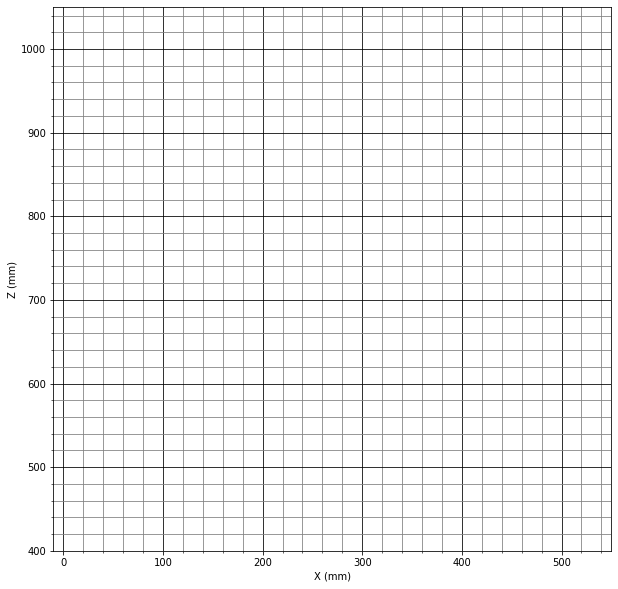

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.grid(b=True, which='minor', color='gray', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs45=[]
zs45=[]
for i in range(xs.size):
    if(validThetaMinus45[i,0,0]>0):
        xs45.append(xs[i])
        zs45.append(zs[i])
for i in range(len(zs45)):
    zs45[i]=zs45[i]
plt.scatter(xs,zs,s=5,color='blue')
plt.scatter(xs45,zs45,s=5,color='red')
def split(l1,l2):
    same=[]
    foundSame = np.zeros((len(l1),len(l2)))
    for i in range(len(ll)):
        for j in range(len(l2)):
            if(l1[i]==l2[j]):
                same.append(l1[i])
                foundSame[i,j]=1
    return same

plt.title("Dorna 1 Achievable XZ positions -45deg w/ 40cm Tool 0cm Offset")
plt.savefig("XZ_SpatialFreedomMinus45degWith0cmOffset40cmTool.png")